In [17]:
import numpy as np
import librosa
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split

# Load the audio file
audio_data, sampling_rate = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)

# Extract STFT features
stft_features = np.abs(librosa.stft(audio_data))

# Extract LPC features
lpc_order = 13  
lpc_features = librosa.lpc(audio_data, order=lpc_order)
lpc_features = np.squeeze(lpc_features)

# Average MFCC and STFT features along time axis
mfcc_avg_features = np.mean(mfcc_features, axis=1)
stft_avg_features = np.mean(stft_features, axis=1)

# Concatenate features
concatenated_features = np.concatenate((mfcc_avg_features, stft_avg_features, lpc_features), axis=0)

# Duplicate the single sample to create a dataset with more than one sample
X_data = np.repeat(np.expand_dims(concatenated_features, axis=0), 10, axis=0)
y_data = np.ones(10)  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Add a time step dimension to X_train and X_test
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile and train LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Define Bi-LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(128), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compile and train Bi-LSTM model
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


C:\Users\harih\AppData\Local\Temp\ipykernel_3904\1767161077.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 1.5274 - val_accuracy: 0.0000e+00 - val_loss: 1.5112
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.5112 - val_accuracy: 0.0000e+00 - val_loss: 1.4950
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 1.4950 - val_accuracy: 0.0000e+00 - val_loss: 1.4789
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 1.4789 - val_accuracy: 0.0000e+00 - val_loss: 1.4629
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4629 - val_accuracy: 0.0000e+00 - val_loss: 1.4470
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4470 - val_accuracy: 0.0000e+00 - val_loss: 1.4311
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0000e+00 - loss: 1.4311 - val_accuracy: 0.0000e+00 - val_loss: 1.4154
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 1.

C:\Users\harih\AppData\Local\Temp\ipykernel_3128\3117382944.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('Bhanumati Weds Rajat.mp3', sr=None)


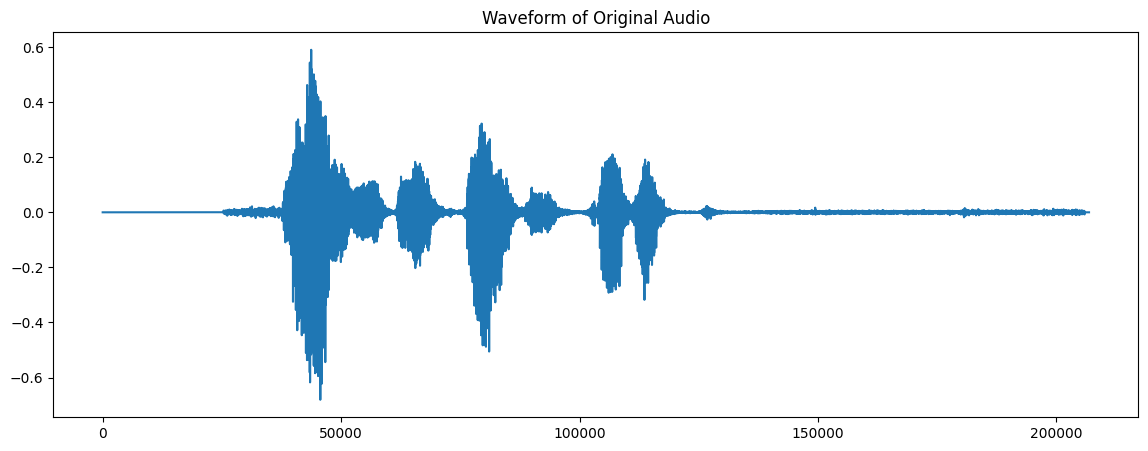

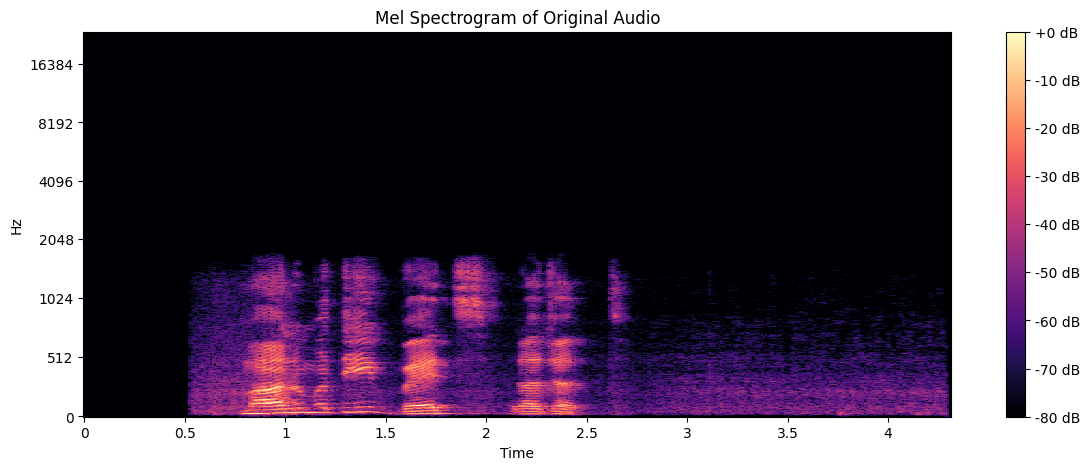

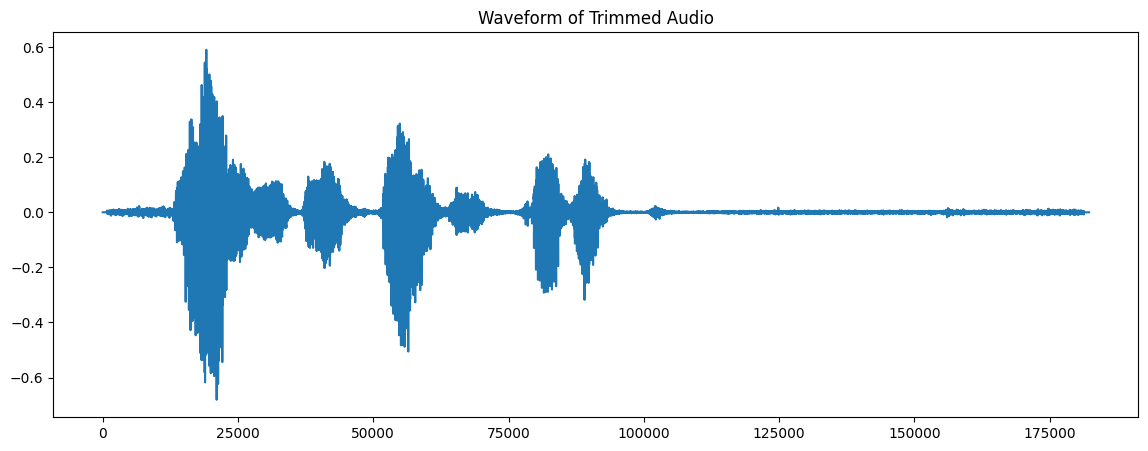

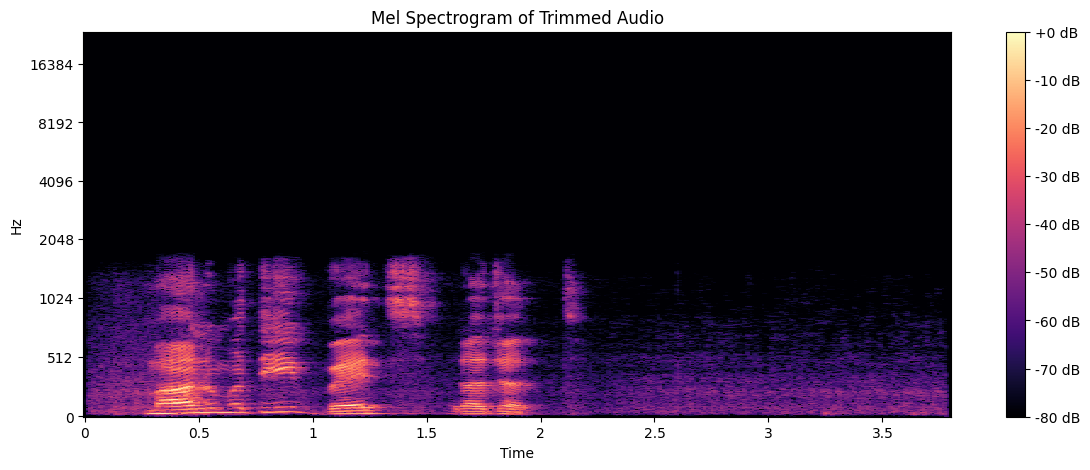

In [4]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
audio_file = 'Bhanumati Weds Rajat.mp3'
audio_data, sampling_rate = librosa.load(audio_file, sr=None)
trimmed_audio, trim_index = librosa.effects.trim(audio_data)
sf.write('trimmed_audio.wav', trimmed_audio, sampling_rate)

# Plot waveform of original audio
plt.figure(figsize=(14, 5))
plt.plot(audio_data)
plt.title('Waveform of Original Audio')
plt.show()

# Plot melspectrogram of original audio
plt.figure(figsize=(14, 5))
original_spec = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
librosa.display.specshow(original_spec, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Original Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Plot waveform of trimmed audio
plt.figure(figsize=(14, 5))
plt.plot(trimmed_audio)
plt.title('Waveform of Trimmed Audio')
plt.show()

# Plot melspectrogram of trimmed audio
plt.figure(figsize=(14, 5))
trimmed_spec = librosa.amplitude_to_db(np.abs(librosa.stft(trimmed_audio)), ref=np.max)
librosa.display.specshow(trimmed_spec, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Trimmed Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()
